In [1]:
import numpy as np
import pandas as pd
from utils import odr_fit

slope: 2.7497173121154574
slope_error: 0.2012351620872117
intercept: 0.07186859364178272
intercept_error: 0.11056953030025464
slope: 3.0723955387902
slope_error: 0.15006559587702484
intercept: -0.23651631270514423
intercept_error: 0.08250728008824776


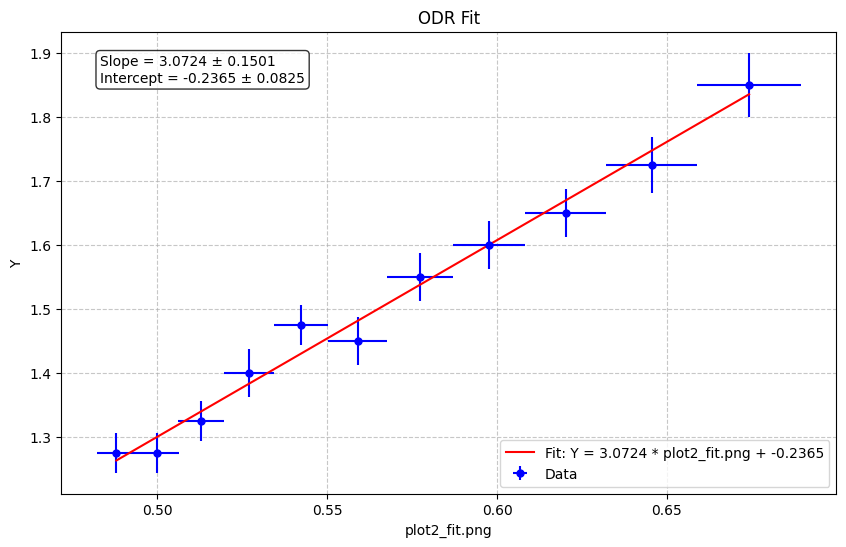

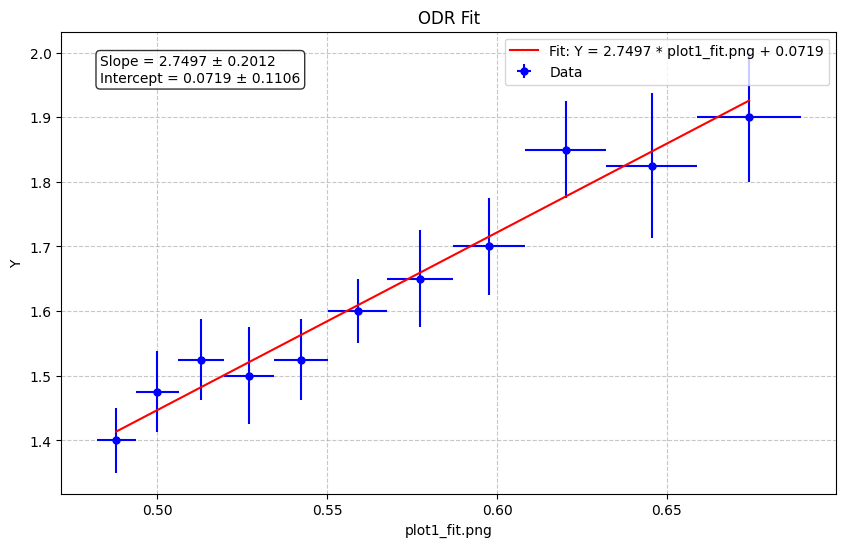

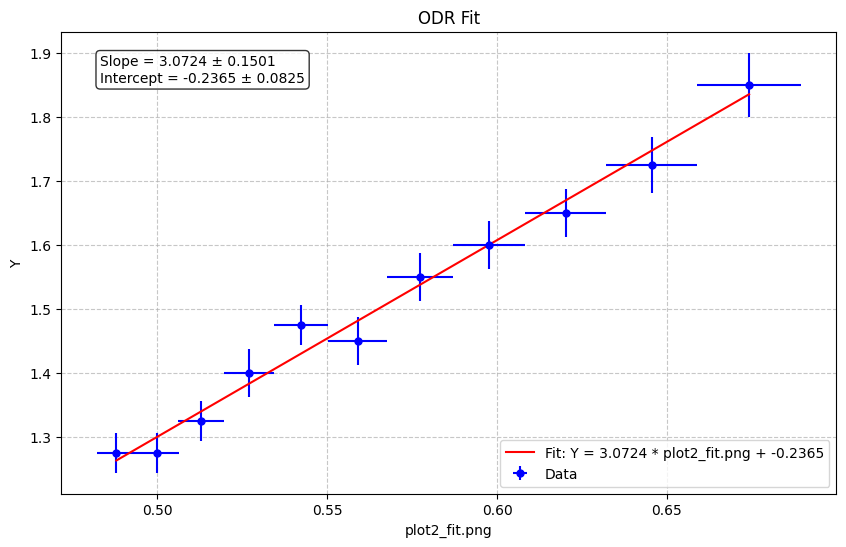

In [4]:
df = pd.read_excel("data/dispersion.xlsx")

voltage = df["voltage-kv"].apply(lambda t: 1 / np.sqrt(t))
voltage_error = df["voltage-kv"].apply(lambda t: (1 / np.sqrt(t)) * 0.5 * 0.1 / t)

R1s = (df["diameter_in_external-mm"] + df["diameter_in_internal-mm"]) / 4
dR1s = (df["diameter_in_external-mm"] - df["diameter_in_internal-mm"]) / 8

R2s = (df["diameter2_in_external-mm"] + df["diameter2_in_internal-mm"]) / 4
dR2s = (df["diameter2_in_external-mm"] - df["diameter2_in_internal-mm"]) / 16

slope1, slope_error1, intercept1, intercept_error1 = (
    odr_fit.perform_odr_fit(voltage.values, R1s.values, voltage_error.values, dR1s.values)
)
print(f"slope: {slope1}\nslope_error: {slope_error1}\nintercept: {intercept1}\nintercept_error: {intercept_error1}")
slope2, slope_error2, intercept2, intercept_error2 = (
    odr_fit.perform_odr_fit(voltage.values, R2s.values, voltage_error.values, dR2s.values)
)
print(f"slope: {slope2}\nslope_error: {slope_error2}\nintercept: {intercept2}\nintercept_error: {intercept_error2}")

odr_fit.plot_odr_fit(
    voltage.values,
    R1s.values,
    slope1,
    intercept1,
    slope_error1,
    intercept_error1,
    voltage_error.values,
    dR1s.values,
    "plot1_fit.png",
)

odr_fit.plot_odr_fit(
    voltage.values,
    R2s.values,
    slope2,
    intercept2,
    slope_error2,
    intercept_error2,
    voltage_error.values,
    dR2s.values,
    "plot2_fit.png",
)